<a href="https://colab.research.google.com/github/dsharanya2001/MLHW3/blob/main/MLA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score

# reading the Test and Train data
_data = pd.read_csv("/content/train.csv")
_test_data = pd.read_csv("/content/test.csv")

In [13]:
print(_data)

# Removing NA/null and duplicate values from columns
_data = _data.dropna()
_data = _data.drop_duplicates()

# Tranforming sex, Embark and Pclass to columns for more information and detailing
new_col = ["Sex","Embarked"]
# new_data = []


_data['Embarked'] = _data['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
_data['Sex'] = _data['Sex'].map( {'male': 0, 'female': 1} ).astype(int)

# Dropping redundant columns, we also drop sex, Pclass, Embarked since these values are transformed to classes/columns and added to the original data.
unwanted_col = ["Name","Cabin","Ticket","Fare"]
_data = _data.drop(unwanted_col,axis=1)

# Use interpolate function to fill all the missing values in the age. Interpolate fills the missing values with the median value
_data["Age"] = _data["Age"].interpolate()
print(_data)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

0.7978142076502732

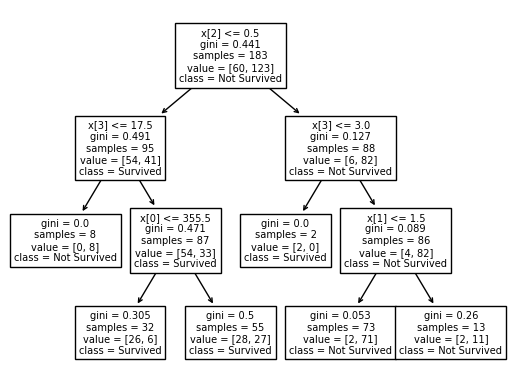

In [ ]:
X = _data.drop(["Survived"],axis=1).values
Y = _data["Survived"].values

# X still has survived column values removing the column
# X = np.delete(X,1,axis=1)

# Using Decision tree classifier for decision tree
clf = tree.DecisionTreeClassifier(max_depth = 3)
clf = clf.fit(X,Y)
# print(clf.score)
tree.plot_tree(clf,class_names = ['Survived','Not Survived'])
clf.score(X,Y)

In [ ]:
# get_dummies converts the values of column to a set of columns or class of different values.

_test_data['Embarked'] = _test_data['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
_test_data['Sex'] = _test_data['Sex'].map( {'male': 0, 'female': 1} ).astype(int)

_test_data["Age"] = _test_data["Age"].interpolate()

_tested_data = _test_data["PassengerId"]
_test_data = _test_data.drop(unwanted_col,axis=1)
_test_data=_test_data.dropna()

classified_val = clf.predict(_test_data)
classified_data = pd.DataFrame({"PassengerId":_tested_data,"Survived":classified_val})
print(classified_data)

     PassengerId  Survived
0            892         0
1            893         1
2            894         0
3            895         0
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [ ]:

KFold,
# For 5 fold cross validation we divide the dataset into 5 parts and each time we choose the 4 parts as training set and the remaining as testset
cv = KFold(n_splits=5)
cross_Validation_scores = cross_val_score(clf,X,Y,cv=cv)
print(cross_Validation_scores.mean())

0.7639639639639639


In [ ]:
model_rf = RandomForestClassifier()
model_rf = model_rf.fit(X,Y)
y_pred_forest = model_rf.predict(_test_data)
y_pred_forest
cross_Validation_scores = cross_val_score(model_rf,X,Y,cv=cv)
print(cross_Validation_scores.mean())

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


0.7321321321321321


In [ ]:
from sklearn.ensemble import BaggingClassifier
classification_1 = tree.DecisionTreeClassifier(max_depth=3)
bagging_classifier = BaggingClassifier(estimator=classification_1,n_estimators=100,random_state=1)
bagging_classifier.fit(X,Y)
y_pred = bagging_classifier.predict(_test_data)
# Calculate the accuracy score
bagging_classifier.score(X,Y)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but BaggingClassifier was fitted without feature names
  warnings.warn(


0.825136612021858

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
adaBoost = AdaBoostClassifier(learning_rate=1.0,n_estimators=100)
adaBoost.fit(X,Y)
y_pred = adaBoost.predict(_test_data)
# Calculate the accuracy score
adaBoost.score(X,Y)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names
  warnings.warn(


0.9617486338797814